<a href="https://colab.research.google.com/github/karthickthangadurai/Guvi_Task_6/blob/main/T6_Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

In [35]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [5]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [6]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [7]:
df['Sex'].unique()

array([0, 1])

In [8]:
df['Rank'].unique()

array([3, 2, 1])

In [9]:
df['Year'].unique()

array([25, 13, 10,  7, 19, 16,  0, 12, 15,  9, 11,  6,  8,  5,  3,  4,  1,
        2])

In [10]:
df['Degree'].unique()

array([1, 0])

In [11]:
df['YSdeg'].unique()

array([35, 22, 23, 27, 30, 21, 32, 18, 31, 19, 17, 24, 15, 20, 14, 13, 12,
       16,  7, 33, 29,  9,  4,  5, 11,  3,  1,  6,  2])

In [12]:
col=df.columns[:-1]
col

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], dtype='object')

# **Outliers**

In [13]:
#Finding the IQR and Upper Limit and Lower Limit
for i in col:

  percentile25 = df[i].quantile(0.25)
  percentile75 = df[i].quantile(0.75)
  iqr=percentile75 - percentile25
  upper_limit = round(percentile75 + 1.5 * iqr)
  lower_limit = round(percentile25 - 1.5 * iqr)
  print(f"{i} \n Upper limit is {upper_limit} \n Lower_limit is {lower_limit}")
  

Sex 
 Upper limit is 2 
 Lower_limit is -2
Rank 
 Upper limit is 6 
 Lower_limit is -2
Year 
 Upper limit is 23 
 Lower_limit is -9
Degree 
 Upper limit is 2 
 Lower_limit is -2
YSdeg 
 Upper limit is 48 
 Lower_limit is -18


#EDA

Correlation


,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


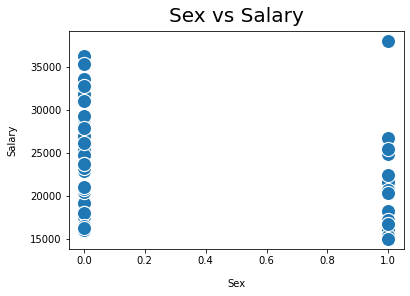

In [14]:
import seaborn as sns
sns.scatterplot(x='Sex', y='Salary', data=df, s=200)
plt.title("Sex vs Salary", y=1.015, fontsize=20)
plt.xlabel("Sex", labelpad=13)
plt.ylabel("Salary", labelpad=13)
print("Correlation")
df[["Sex","Salary"]].corr()

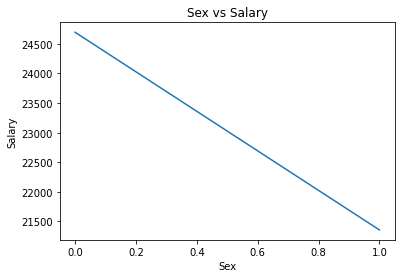

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [15]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
df[['Sex','Salary']].corr()

Correlation


,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


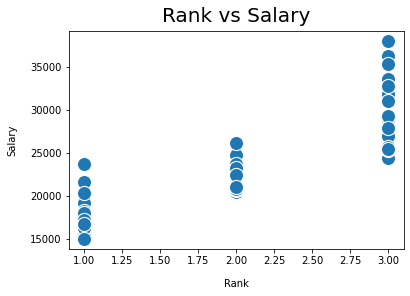

In [16]:
sns.scatterplot(x='Rank', y='Salary', data=df, s=200)
plt.title("Rank vs Salary", y=1.015, fontsize=20)
plt.xlabel("Rank", labelpad=13)
plt.ylabel("Salary", labelpad=13)
ax = plt.gca()
print("Correlation")
df[["Rank","Salary"]].corr()

Correlation


,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


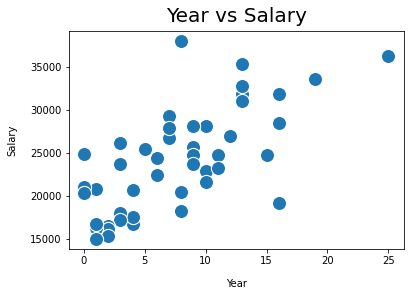

In [17]:
sns.scatterplot(x='Year', y='Salary', data=df, s=200)
plt.title("Year vs Salary", y=1.015, fontsize=20)
plt.xlabel("Year", labelpad=13)
plt.ylabel("Salary", labelpad=13)
ax = plt.gca()
print("Correlation")
df[["Year","Salary"]].corr()

1) There is a linear relationship between year and salary

2) As year increases, salary also increases

3) No transformation required


Correlation


,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


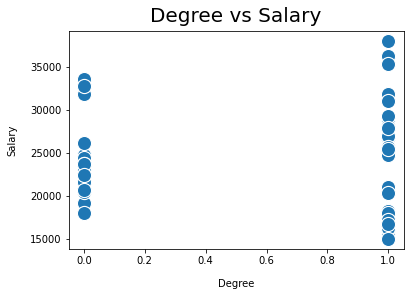

In [18]:
sns.scatterplot(x='Degree', y='Salary', data=df, s=200)
plt.title("Degree vs Salary", y=1.015, fontsize=20)
plt.xlabel("Degree", labelpad=13)
plt.ylabel("Salary", labelpad=13)
ax = plt.gca()
print("Correlation")
df[["Degree","Salary"]].corr()

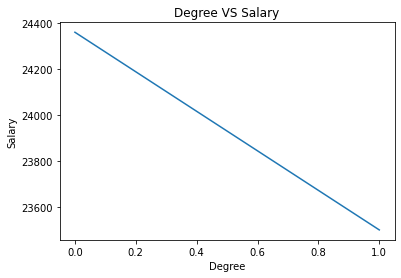

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [19]:
data=df.groupby('Degree')['Salary'].mean()
data.plot()
plt.title('Degree VS Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['Degree','Salary']].corr()

# **No Correlation Between Degree and Salary.So,Transforming the feature**

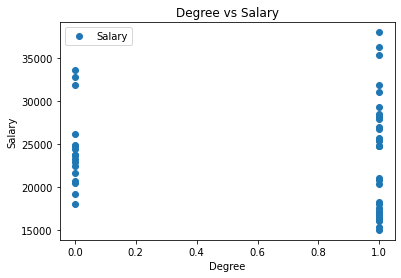

,trans_sqrt,Salary
trans_sqrt,1.000000,-0.069726
Salary,-0.069726,1.000000


In [20]:
df['trans_sqrt'] = np.square(df['Degree'])#transofrming
 
df.plot(x='trans_sqrt', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['trans_sqrt','Salary']].corr()

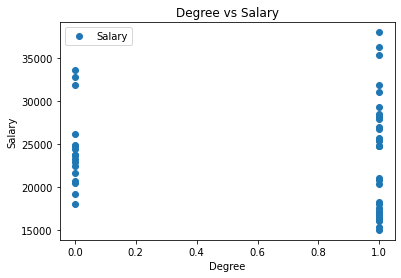

,trans_power,Salary
trans_power,1.000000,-0.069726
Salary,-0.069726,1.000000


In [21]:
df['trans_power'] = np.power(df['Degree'],3)#transofrming
df.plot(x='trans_power', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['trans_power','Salary']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


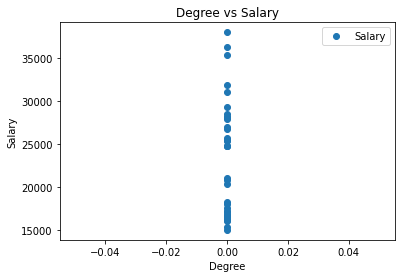

,trans_log,Salary
trans_log,NaN,NaN
Salary,NaN,1.0


In [22]:
df['trans_log'] = np.log(df['Degree'])#transofrming
df.plot(x='trans_log', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['trans_log','Salary']].corr()

# **There is No Correlation Between Degree and Salary.So,Didnot able to use this as Feature**

Correlation


,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


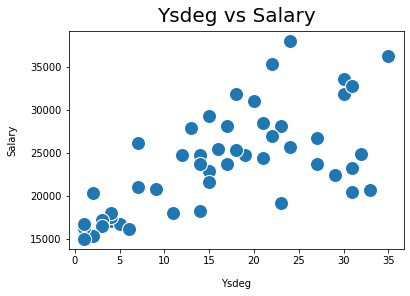

In [23]:
sns.scatterplot(x='YSdeg', y='Salary', data=df, s=200)
plt.title("Ysdeg vs Salary", y=1.015, fontsize=20)
plt.xlabel("Ysdeg", labelpad=13)
plt.ylabel("Salary", labelpad=13)
ax = plt.gca()
print("Correlation")
df[["YSdeg","Salary"]].corr()

In [24]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary', 'trans_sqrt',
       'trans_power', 'trans_log'],
      dtype='object')

# **Splitting**

In [25]:
X = df[['Sex', 'Rank', 'Year','Degree','YSdeg']].values 
y = df['Salary'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# **Modle Fitting**

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# **1. Find the linear regression equation for this data using columns 1-5 to column 6.**

In [29]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year','Degree','YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
y_pred

array([28581.62357131, 22246.06438527, 29780.29177927, 17492.2331291 ,
       16310.3024151 , 23984.70969417, 28032.65036216, 26736.37230724,
       32406.42181899, 23862.52202555, 30115.69135824, 16731.20379012,
       29457.00025122, 26098.21267744, 31366.28743236, 28785.83937344])

In [30]:
coeff_df

,Coefficient
Sex,739.118701
Rank,4990.925538
Year,2105.383570
Degree,-1015.163416
YSdeg,-1705.078812


# **2) Find the selection of columns with the best R2 score.**

In [31]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8229330984697069


# **3. Report whether sex is a factor in salary**

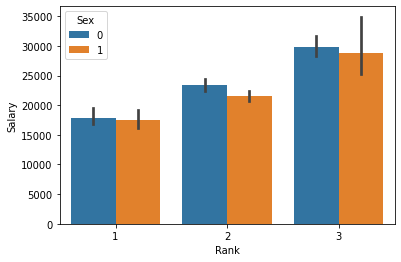

In [32]:
import seaborn as sns
sns.barplot(x=df['Rank'],y=df['Salary'],hue=df['Sex'])

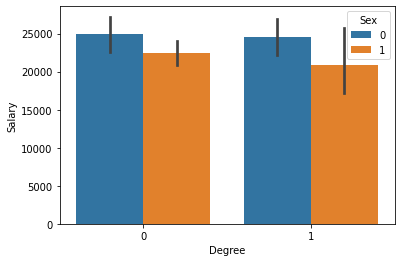

In [33]:
import seaborn as sns
sns.barplot(x=df['Degree'],y=df['Salary'],hue=df['Sex'])

# **We can see that there is a small difference between Rank vs Salary and Degree vs Salary. It is observed that rank 0 (male) paid more than rank 1 (female)**